   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.4 MB/s eta 0:00:00
Upload 'Traffic Final Data.csv' first:


Saving Traffic Final Data.csv to Traffic Final Data.csv
Upload 'Traffic Final Datawith Day.csv' next:


Saving Traffic Final Data with day.csv to Traffic Final Data with day.csv


<ipython-input-1-f4744c313279>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


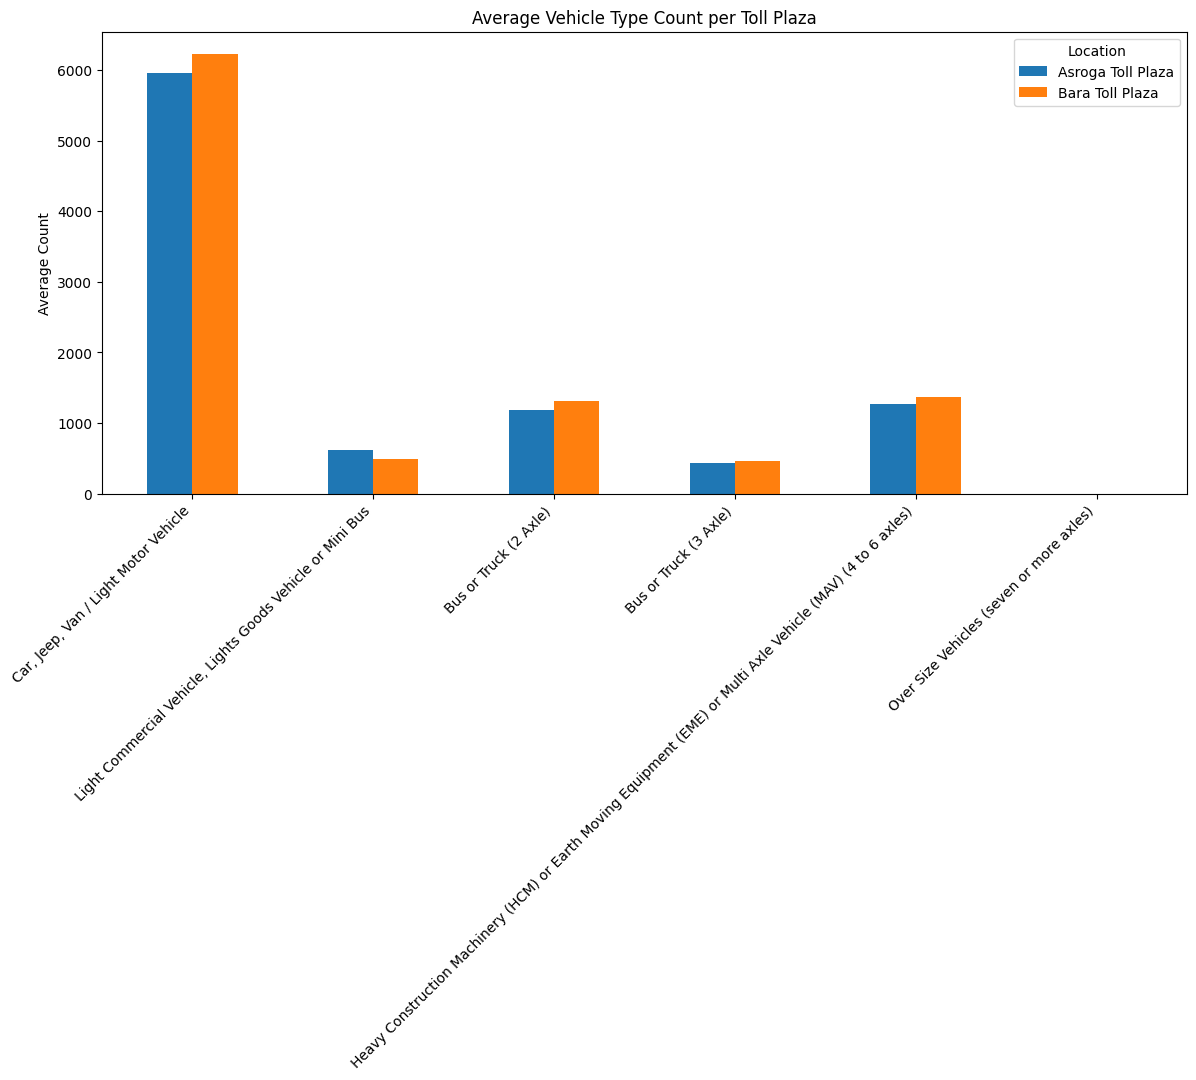

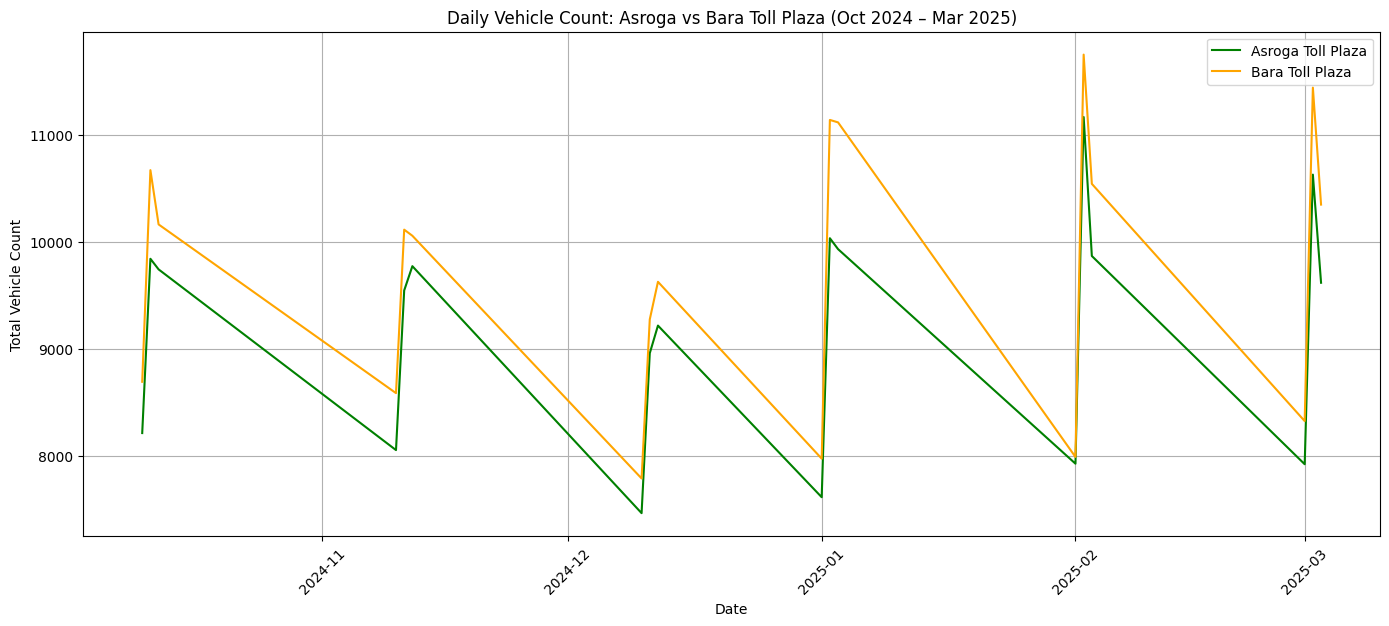

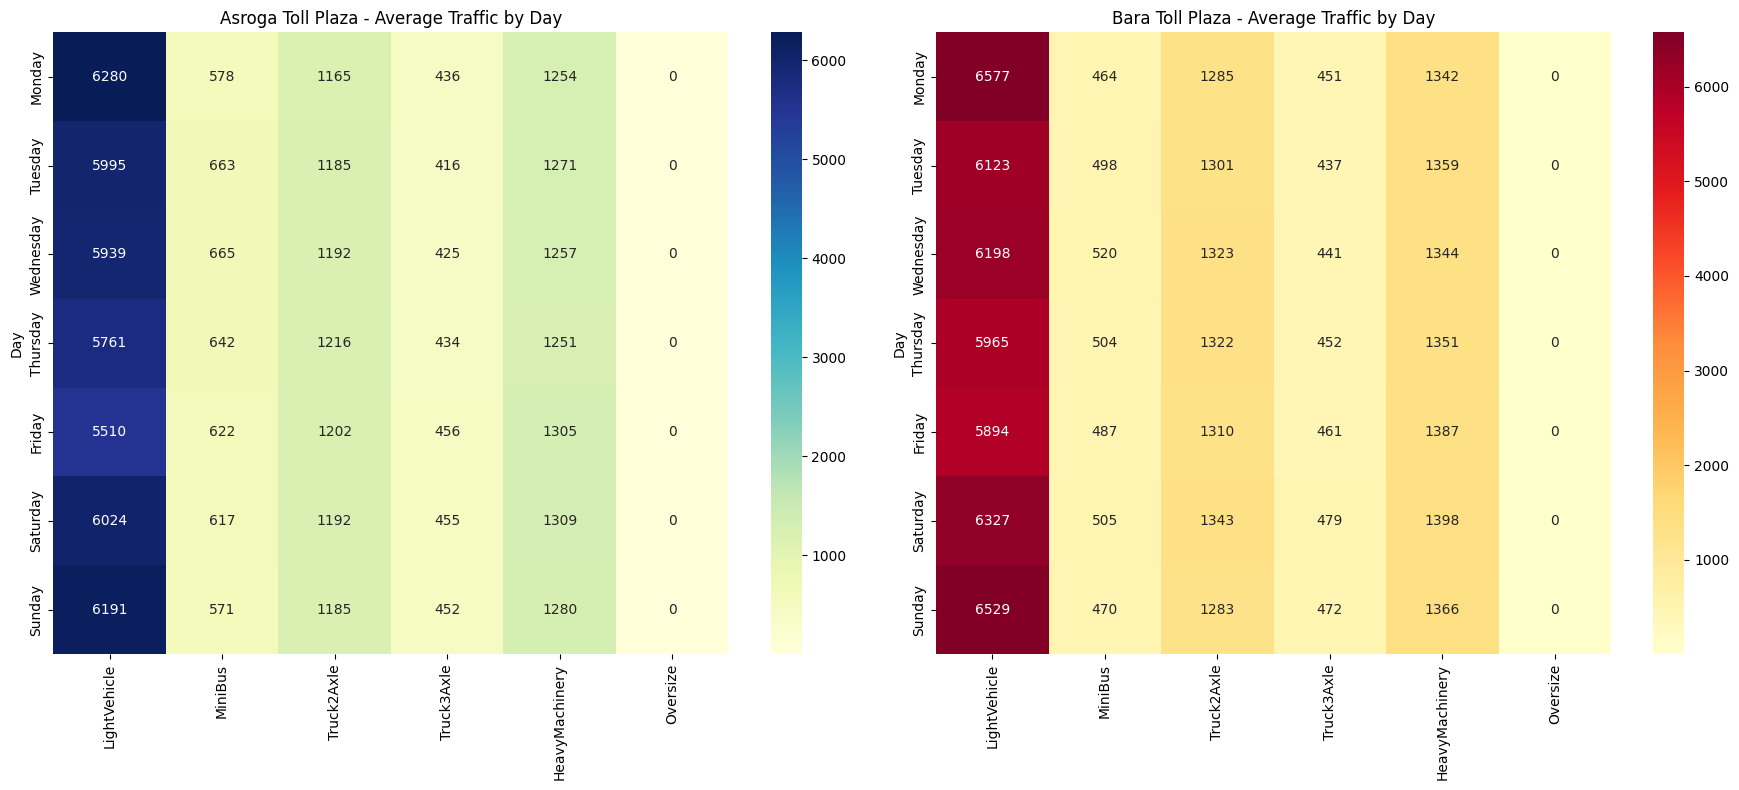

In [ ]:
# Install required library
!pip install xlsxwriter

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# --- Upload Files ---
print("Upload 'Traffic Final Data.csv' first:")
uploaded1 = files.upload()
file1 = list(uploaded1.keys())[0]
df = pd.read_csv(file1)
df.columns = df.columns.str.strip()

print("Upload 'Traffic Final Datawith Day.csv' next:")
uploaded2 = files.upload()
file2 = list(uploaded2.keys())[0]
df_day = pd.read_csv(file2)
df_day.columns = df_day.columns.str.strip()

# --- Clean and Prepare df (Traffic Final Data.csv) ---
numeric_cols = df.columns[2:]
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x.astype(str).str.strip(), errors='coerce'))
df.dropna(inplace=True)
df['Location_Code'] = LabelEncoder().fit_transform(df['Location'])

# --- Vehicle Stats by Location ---
vehicle_types = df.columns[2:-2]
avg_by_location = df.groupby("Location")[vehicle_types].mean().T

# --- Bar Chart ---
avg_by_location.plot(kind='bar', figsize=(14, 6))
plt.title("Average Vehicle Type Count per Toll Plaza")
plt.ylabel("Average Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Convert 'Date' column to datetime format ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter date range ---
mask = (df['Date'] >= '2024-10-01') & (df['Date'] <= '2025-03-31')
df_filtered = df.loc[mask]

# --- Filter for Asroga and Bara toll plazas ---
asroga = df_filtered[df_filtered['Location'].str.contains('Asroga', case=False, na=False)]
bara = df_filtered[df_filtered['Location'].str.contains('Bara', case=False, na=False)]

# --- Group by date and sum total vehicles ---
asroga_daily = asroga.groupby('Date')['Total Vehicles'].sum()
bara_daily = bara.groupby('Date')['Total Vehicles'].sum()

# --- Plotting line chart ---
plt.figure(figsize=(14, 6))
plt.plot(asroga_daily.index, asroga_daily.values, label='Asroga Toll Plaza', color='green')
plt.plot(bara_daily.index, bara_daily.values, label='Bara Toll Plaza', color='orange')
plt.title('Daily Vehicle Count: Asroga vs Bara Toll Plaza (Oct 2024 – Mar 2025)')
plt.xlabel('Date')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# --- 📌 Heatmaps: Use df_day (Traffic Final Datawith Day.csv) ---
# Rename columns for simplicity if needed
df_day.columns = [
    "Date", "Day", "Location",
    "LightVehicle", "MiniBus",
    "Truck2Axle", "Truck3Axle",
    "HeavyMachinery", "Oversize",
    "Total"
]

# Convert numeric columns
day_numeric_cols = df_day.columns[3:]
df_day[day_numeric_cols] = df_day[day_numeric_cols].apply(lambda x: pd.to_numeric(x.astype(str).str.strip(), errors='coerce'))
df_day.dropna(inplace=True)

# Group by Day for each Toll Plaza
asroga_daywise = df_day[df_day["Location"] == "Asroga Toll Plaza"].groupby("Day").mean(numeric_only=True)
bara_daywise = df_day[df_day["Location"] == "Bara Toll Plaza"].groupby("Day").mean(numeric_only=True)

# Sort days for consistent axis
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
asroga_daywise = asroga_daywise.reindex(day_order)
bara_daywise = bara_daywise.reindex(day_order)

# --- Plot Side-by-Side Heatmaps ---
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(asroga_daywise[day_numeric_cols[:-1]], cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Asroga Toll Plaza - Average Traffic by Day")

plt.subplot(1, 2, 2)
sns.heatmap(bara_daywise[day_numeric_cols[:-1]], cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Bara Toll Plaza - Average Traffic by Day")

plt.tight_layout()
plt.show()
